Cannabis is a kind of  plant for medical or recreational use. it  can be used by extact products, smoking, vaporizing, food, and so on.



Our goal is to describe the established data source with at least rough data able to be provided on day one. And all research will be done at Friday 29 May.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cannabis.csv")
print(df.shape)
df.head()

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [3]:
df.columns.to_list()

['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description']

In [4]:
df.describe()

,Rating
count,2351.000000
mean,4.310634
std,0.836394
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


In [5]:
df['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [6]:
df['Type'].value_counts(ascending=False)

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

In [7]:
df['Rating'].unique()

array([4. , 4.7, 4.4, 4.2, 4.6, 0. , 4.5, 4.3, 5. , 3.8, 4.1, 4.8, 3.4,
       3.7, 3.9, 3. , 4.9, 3.6, 2.8, 3.3, 3.5, 3.2, 2. , 1. , 3.1, 2.5])

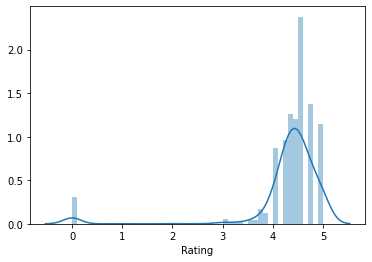

In [8]:
import seaborn as sns
y= df['Rating']
sns.distplot(y);

In [9]:
# Most columns are objective.
df.select_dtypes(exclude="number").columns.tolist()

['Strain', 'Type', 'Effects', 'Flavor', 'Description']

In [10]:
df.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [11]:
df.drop_duplicates(subset ='Strain', keep=False,inplace=True)
df = df[df['Description'].notnull()]
df = df[df['Flavor'].notnull()]
df.reset_index(inplace = True)
df.shape

(2275, 7)

In [12]:
#df = df.dropna(how='all')

In [13]:
total_flavor = []
max_len = 0
total_flavor.append("None")
for val in df["Flavor"].values:
    print(val)
    val = val.split(",")
    
    if len(val) > max_len:
        max_len = len(val)
    
    for f in val:
        if f not in total_flavor:
            total_flavor.append(f)

Earthy,Sweet,Citrus
Flowery,Violet,Diesel
Spicy/Herbal,Sage,Woody
Apricot,Citrus,Grapefruit
Citrus,Earthy,Orange
None
Earthy,Sweet,Pungent
Citrus,Pungent,Earthy
Earthy,Woody,Flowery
Earthy,Grape,Sweet
Pine,Diesel
Earthy,Pine,Skunk
Earthy,Woody,Pine
Earthy,Woody,Pungent
Citrus,Earthy,Pine
Earthy,Diesel,Flowery
None
Earthy,Sweet,Berry
Earthy,Pungent,Berry
Citrus,Pungent,Sweet
Diesel,Pepper,Earthy
Earthy,Woody,Citrus
Earthy,Pine,Woody
Earthy,Pungent,Woody
Earthy,Pungent,Citrus
Menthol,Blue,Cheese,Chemical
Earthy,Pine,Diesel
Earthy,Sweet,Pungent
Earthy,Diesel,Spicy/Herbal
Earthy,Sweet,Woody
Earthy,Mango,Lemon
Lemon,Diesel,Earthy
None
Sweet,Flowery,Earthy
Pungent,Lemon,Peach
Sweet,Vanilla
Earthy,Diesel,Chemical
Nutty,Earthy,Chestnut
Earthy,Flowery,Tea
Earthy,Flowery,Woody
Skunk,Woody,Sweet
Earthy,Diesel,Pungent
Flowery,Diesel,Sweet
Earthy,Sweet,Pine
Lemon,Citrus,Sweet
Flowery,Chemical,Spicy/Herbal
Sweet,Flowery,Skunk
Citrus,Skunk
Earthy,Sweet,Woody
Sweet,Pine,Woody
Woody,Pine,Pungent
Tobacc

In [15]:
len(total_flavor)

50

Summary 1 of our data: 

The dataset is 2351 x 6. Null values: 'Flavor' has 46 null values; 'Description' has   33 null values. 

Names of columns are : 'Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'.Most columns are objective.

'Rating' is numeric only. Most rating is 5 or 4, means most with good rating score.

Total types of weeds is 3: 'hybrid', 'sativa', 'indica'. Record of the types: hybrid :1212; indica: 699; sativa: 440.

Total number of flavor is 50. Top 10 flavor are "Butter,Sweet,Earthy;
Skunk,Sweet,Earthy;
Tropical,Earthy,Sweet;
Earthy,Pungent,Woody;
Earthy,Woody,Pungent;
Earthy,Sweet,Tropical;
Earthy,Citrus,Woody;
Earthy,Skunk,Pungent;
Sweet,Earthy;
Citrus,Pine,Earthy"






In [14]:
#!python -m spacy download en_core_web_lg

In [15]:
# Start NLP

In [16]:
# Base
from collections import Counter
import re

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [17]:
tokenizer =Tokenizer(nlp.vocab)

sample_text="Natural language!"
[token.text for token in tokenizer(sample_text)]

['Natural', 'language!']

In [18]:
import re
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', ',', text)
    tokens = tokens.lower().replace(',', ' ')
    tokens = tokens.split()
    
    return tokens

In [19]:
df['Effects_tokens'] = df['Effects'].apply(tokenize)
df['Effects_tokens'].head()

0    [creative, energetic, tingly, euphoric, relaxed]
1      [relaxed, aroused, creative, happy, energetic]
2     [uplifted, happy, relaxed, energetic, creative]
3       [tingly, creative, hungry, relaxed, uplifted]
4     [happy, relaxed, euphoric, uplifted, talkative]
Name: Effects_tokens, dtype: object

In [20]:
df['Flavor_tokens'] = df['Flavor'].apply(tokenize)
df['Flavor_tokens'].head()

0          [earthy, sweet, citrus]
1        [flowery, violet, diesel]
2     [spicy, herbal, sage, woody]
3    [apricot, citrus, grapefruit]
4         [citrus, earthy, orange]
Name: Flavor_tokens, dtype: object

In [21]:
from collections import Counter
 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(list(temp), columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc

In [22]:
wc_effects = count(df['Effects_tokens'])

wc_effects.sort_values(by='rank')

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,happy,1823,1823,1.0,0.167156,0.167156,0.801319
3,relaxed,1691,1691,2.0,0.155052,0.322208,0.743297
4,euphoric,1590,1590,3.0,0.145791,0.467999,0.698901
7,uplifted,1464,1464,4.0,0.134238,0.602237,0.643516
1,creative,719,719,5.0,0.065927,0.668164,0.316044
13,sleepy,718,718,6.0,0.065835,0.734000,0.315604
0,energetic,618,618,7.0,0.056666,0.790666,0.271648
12,focused,585,585,8.0,0.053640,0.844306,0.257143
8,hungry,458,458,9.0,0.041995,0.886301,0.201319
9,talkative,350,350,10.0,0.032092,0.918394,0.153846


In [23]:
wc_effects.shape

(16, 7)

In [24]:
wc_flavor = count(df['Flavor_tokens'])

wc_flavor.sort_values(by='rank')

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,earthy,1091,1091,1.0,0.161438,0.161438,0.479560
1,sweet,1039,1039,2.0,0.153744,0.315182,0.456703
2,citrus,516,516,3.0,0.076354,0.391536,0.226813
14,pungent,441,441,4.0,0.065256,0.456792,0.193846
18,berry,352,352,5.0,0.052086,0.508878,0.154725
16,pine,293,293,6.0,0.043356,0.552234,0.128791
5,flowery,265,265,7.0,0.039213,0.591447,0.116484
8,woody,252,252,8.0,0.037289,0.628736,0.110769
4,diesel,237,237,9.0,0.035070,0.663806,0.104176
6,spicy,225,225,10.0,0.033294,0.697100,0.098901


In [25]:
# find the unique effects
wc_effects = wc_effects.sort_values(by='rank')
wc_effects['word'].to_list()

['happy',
 'relaxed',
 'euphoric',
 'uplifted',
 'creative',
 'sleepy',
 'energetic',
 'focused',
 'hungry',
 'talkative',
 'tingly',
 'giggly',
 'aroused',
 'none',
 'dry',
 'mouth']

In [26]:
# len(wc_effects'word'].to_list())

In [27]:
#to find unique flavors
wc_flavor = wc_flavor.sort_values(by='rank')
wc_flavor['word'].to_list()[:26]

['earthy',
 'sweet',
 'citrus',
 'pungent',
 'berry',
 'pine',
 'flowery',
 'woody',
 'diesel',
 'spicy',
 'herbal',
 'lemon',
 'skunk',
 'tropical',
 'blueberry',
 'grape',
 'none',
 'orange',
 'cheese',
 'pepper',
 'lime',
 'strawberry',
 'minty',
 'pineapple',
 'sage',
 'grapefruit']

In [28]:
len(wc_flavor['word'].to_list())

51

In [29]:
df['Description'] = df['Description'].str.replace(u'\xa0', u' ')
df['Description'].head()

0    $100 OG is a 50/50 hybrid strain that packs a ...
1    The ‘98 Aloha White Widow is an especially pot...
2    1024 is a sativa-dominant hybrid bred in Spain...
3    13 Dawgs is a hybrid of G13 and Chemdawg genet...
4    Also known as Kosher Tangie, 24k Gold is a 60%...
Name: Description, dtype: object

In [30]:
# Tokenizer Pipe
from spacy.tokenizer import Tokenizer

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

tokens = []
STOP_WORDS = nlp.Defaults.stop_words.union([' '])

""" Make them tokens """
for doc in tokenizer.pipe(df['Description'], batch_size=500):
    doc_tokens = []   
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower()) 
    tokens.append(doc_tokens)

df['Description_tokens'] = tokens

In [31]:
df['General_Description'] = df['Effects']+""+df['Flavor']+""+df['Description']

In [32]:
df.head()

,index,Strain,Type,Rating,Effects,Flavor,Description,Effects_tokens,Flavor_tokens,Description_tokens,General_Description
0,0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,"[creative, energetic, tingly, euphoric, relaxed]","[earthy, sweet, citrus]","[$100, og, 50/50, hybrid, strain, packs, stron...","Creative,Energetic,Tingly,Euphoric,RelaxedEart..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,"[relaxed, aroused, creative, happy, energetic]","[flowery, violet, diesel]","[‘98, aloha, white, widow, especially, potent,...","Relaxed,Aroused,Creative,Happy,EnergeticFlower..."
2,2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"[uplifted, happy, relaxed, energetic, creative]","[spicy, herbal, sage, woody]","[1024, sativa-dominant, hybrid, bred, spain, m...","Uplifted,Happy,Relaxed,Energetic,CreativeSpicy..."
3,3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[tingly, creative, hungry, relaxed, uplifted]","[apricot, citrus, grapefruit]","[13, dawgs, hybrid, g13, chemdawg, genetics, b...","Tingly,Creative,Hungry,Relaxed,UpliftedApricot..."
4,4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...","[happy, relaxed, euphoric, uplifted, talkative]","[citrus, earthy, orange]","[known, kosher, tangie,, 24k, gold, 60%, indic...","Happy,Relaxed,Euphoric,Uplifted,TalkativeCitru..."


In [39]:
df.to_csv('tokenized_cannabis.csv', index=False)

In [51]:
# tfidf allows  each document's most different topics to rise to the top.
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document,similiar to fit_predict
dtm = tf.fit_transform(df['General_Description'])

# Get feature names to use as dataframe column headers
general_dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
general_dtm.head()

,09,10,100,11,12,13,14,15,16,17,...,zen,zest,zestful,zesty,zeta,zion,zkittlez,zombie,zone,zoning
0,0.0,0.0,0.410071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.307635,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Using KNN to meaure n-dimensional distance and measure similarity to query for input and output.Aim is for pattern recognition.
from sklearn.neighbors import NearestNeighbors
# Fit on dtm

nn = NearestNeighbors(n_neighbors=5, algorithm='brute')
nn.fit(general_dtm)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [64]:
#> Test pass
user01_input = ['none, pineapple, peach, Depression']
user01_dense = tf.transform(user01_input)
_, user01_output = nn.kneighbors(user01_dense.todense())

user01_output

array([[ 873, 1440, 1553, 1559, 1555]], dtype=int64)

In [62]:
list_strains = []
for n in user01_output:
    for index in n:
        list_strains.append(index)

for n in list_strains:
    print(f"{df.loc[n,:]}\n")

index                                                                893
Strain                                                  Golden-Pineapple
Type                                                              hybrid
Rating                                                               4.5
Effects                         Happy,Euphoric,Uplifted,Relaxed,Creative
Flavor                                         Pineapple,Tropical,Citrus
Description            Golden Pineapple is a hybrid cross between Gol...
Effects_tokens            [happy, euphoric, uplifted, relaxed, creative]
Flavor_tokens                              [pineapple, tropical, citrus]
Description_tokens     [golden, pineapple, hybrid, cross, golden, goa...
General_Description    Happy,Euphoric,Uplifted,Relaxed,CreativePineap...
Name: 873, dtype: object

index                                                               1478
Strain                                               Northwest-Pineapple
Type                     

In [37]:
desc = [""" 
none,
pineapple,  peach, 
Depression
"""]

new_data = tfidf.transform(desc)

In [38]:
_, similar_topics = nn.kneighbors(new_data.todense())

similar_topics

array([[ 873, 1440, 1553, 1559, 1555]], dtype=int64)

In [39]:
# give 5 outputs by input query ['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description']

strains = [df['Strain'][t] for t in similar_topics]
print('- - - - Strains - - - - ')
print(strains, sep='\n\n')
print(end="\n\n")

types = [df['Type'][t] for t in similar_topics]
print('- - -  Types - - - ')
print(types, sep='\n\n')
print(end="\n\n")

ratings = [df['Rating'][t] for t in similar_topics]
print('- - - Ratings - - -')
print(ratings, sep='\n\n')
print(end="\n\n")

similar_flavors = [df['Flavor'][t] for t in similar_topics]
print('- - - Flavors - - -')
print(similar_flavors, sep='\n\n')
print(end="\n\n")

similar_effects = [df['Effects'][t] for t in similar_topics]
print('- - -  Effects - - - ')
print(similar_effects, sep='\n\n')
print(end="\n\n")


similar_topics = [df['Description'][t] for t in similar_topics]
print('- - -  Descriptions - - - ')
print(similar_topics, sep='\n\n')

- - - - Strains - - - - 
[873                Golden-Pineapple
1440            Northwest-Pineapple
1553                   Pineapple-Og
1559    Pineapple-Super-Silver-Haze
1555         Pineapple-Purple-Skunk
Name: Strain, dtype: object]


- - -  Types - - - 
[873     hybrid
1440    hybrid
1553    sativa
1559    sativa
1555    hybrid
Name: Type, dtype: object]


- - - Ratings - - -
[873     4.5
1440    5.0
1553    4.6
1559    4.7
1555    4.5
Name: Rating, dtype: float64]


- - - Flavors - - -
[873     Pineapple,Tropical,Citrus
1440              Sweet,Pineapple
1553    Pineapple,Citrus,Tropical
1559       Pineapple,Sweet,Earthy
1555       Sweet,Citrus,Pineapple
Name: Flavor, dtype: object]


- - -  Effects - - - 
[873      Happy,Euphoric,Uplifted,Relaxed,Creative
1440              Uplifted,Euphoric,Happy,Relaxed
1553    Happy,Uplifted,Focused,Creative,Energetic
1559      Happy,Euphoric,Energetic,Focused,Tingly
1555      Relaxed,Happy,Uplifted,Euphoric,Aroused
Name: Effects, dtype: object]


In [41]:
# Save tfidf to a pickle
import pickle
# pickle.dump(tfidf, open("tfidf.pkl", "wb"))

In [42]:
# To save the trained model as a pickle file . 
saved_model = pickle.dumps(nn) 
  
#  pickle model 
nn_model = pickle.loads(saved_model) 
  
from sklearn.externals import joblib 
  
# Save as a pickle file 
joblib.dump(nn_model, 'nlp01_model.pkl') 
  
# Load the joblib model for backend use
# nn_model = joblib.load('nlp01_model.pkl') #> File size issues <WARNING>

C:\Users\Michel\anaconda3\envs\U4S1NLP\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [56]:
# pickle.dump(dtm, open('nlp01_dtm.pkl', 'wb'))
# pickle.dump(tfidf, open('nlp01_tf.pkl', 'wb'))